### Final capstone project for the series Data Science offered by IBM on Coursera.

## Project Summary
1. Case study: Imagine you are going down a road in a bad weather condition (thunderstorm, windy, poor visibility, etc). It can be help to have a severity score on a road. The objective of this course is to use available data to classify a given condition into its corresponding severity category.
2. The dataset can be obtained freely through this link: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv. The dataset has 37 attributes to classify the severity into 2 cases (Injury Collision and Property Damage Collision).
3. Who might be interested to this project? Anyone who wish to improve road condition (what to improve and where to prioritize resources based on the severity). Guiding software to find a safer alternative path. 


## Import Libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print("The data set dimension is " + str(dataset.shape))

In [3]:
dataset.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [4]:
dataset.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Data Preprocessing

In [6]:
dataset.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

Drop rows of data where the missing data is minimal compared to the whole dataset

In [7]:
dataset.drop(dataset[dataset["X"].isnull() | dataset["COLLISIONTYPE"].isnull() | dataset["JUNCTIONTYPE"].isnull() \
                     | dataset["UNDERINFL"].isnull() | dataset["WEATHER"].isnull() | dataset["ROADCOND"].isnull() \
                     | dataset["LIGHTCOND"].isnull()].index, inplace=True)

Drop columns of data because there are too much missing information --> useless for now

In [10]:
dataset.drop(["INTKEY", "EXCEPTRSNCODE", "EXCEPTRSNDESC", "INATTENTIONIND", "PEDROWNOTGRNT", "SDOTCOLNUM", "SPEEDING"], axis=1, inplace=True)

Drop these columns because I deem them useless
1. STATUS is categorical but onl have one category
2. LOCATION is redundant because we are using X, Y cordinates
3. SEVERITYCODE.1 is an indentical column of SEVERITYCODE (target label)
4. SEVERITYDESC describe the two cases (target label)
5. INCATE contains the date of the incident but, time is a better factor
6. SDOT_COLDESC is redudant because SDOT_COLCODE already describes it
7. ST_COLDESC is redundant bacause ST_COLCODE already describes it
8. SEGLANEKEY and  CROSSWALKKEY: I don't understand the data nor does it seems like it would be useful
9. OBJECTID, INCKEY, COLDETKEY, and REPORTNO is not helpful because they act as foreignkey or something else (mostly useless)
10. INCDTTM might be helpful but I need to write a function to extract the time portion and discard the date. (Temporarily remove)
11. Temporarily remove UNDERINFL because I'm lazy


In [11]:
dataset.drop(["STATUS", "LOCATION", "SEVERITYCODE.1", "SEVERITYDESC", "INCDATE", "SDOT_COLDESC", "ST_COLDESC", "SEGLANEKEY", "CROSSWALKKEY",\
              "OBJECTID", "INCKEY", "COLDETKEY", "REPORTNO", "INCDTTM", "UNDERINFL"], axis=1, inplace=True)

In [12]:
dataset.isnull().sum()

SEVERITYCODE     0
X                0
Y                0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
JUNCTIONTYPE     0
SDOT_COLCODE     0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
ST_COLCODE       0
HITPARKEDCAR     0
dtype: int64

In [13]:
dataset.describe()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE
count,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000
mean,1.309935,-122.330462,47.619501,2.479405,0.039413,0.030144,1.974498,14.323891
std,0.462468,0.029977,0.056331,1.369008,0.204023,0.172311,0.560060,6.462207
min,1.000000,-122.419091,47.495573,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-122.348640,47.575576,2.000000,0.000000,0.000000,2.000000,11.000000
50%,1.000000,-122.330168,47.615282,2.000000,0.000000,0.000000,2.000000,13.000000
75%,2.000000,-122.311926,47.663939,3.000000,0.000000,0.000000,2.000000,14.000000
max,2.000000,-122.238949,47.734142,81.000000,6.000000,2.000000,12.000000,69.000000


Preprocessing categorical data 

Using OneHotEncoder: ADDRTYPE, COLLISIONTYPE, JUNCTIONTYPE, SDOT_COLCODE, WEATHER, ROADCOND, LIGHTCOND, ST_COLCODE, HITPARKEDCAR 

Special Case: UNDERINFL (Has 4 categories: "yes", "no", 1, 0) assume "yes" is also 1, and "no" is 0

In [14]:
dataset.shape

(180067, 16)

In [15]:
enc_features = dataset[["ADDRTYPE", "COLLISIONTYPE", "JUNCTIONTYPE", "SDOT_COLCODE", \
         "WEATHER", "ROADCOND", "LIGHTCOND", "ST_COLCODE", "HITPARKEDCAR"]]

In [16]:
enc = pd.get_dummies(enc_features, drop_first=True)
dataset.drop(["ADDRTYPE", "COLLISIONTYPE", "JUNCTIONTYPE", "SDOT_COLCODE", \
         "WEATHER", "ROADCOND", "LIGHTCOND", "ST_COLCODE", "HITPARKEDCAR"], axis=1, inplace=True)
dataset = pd.concat([dataset, enc], axis=1)

In [17]:
dataset

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,ADDRTYPE_Intersection,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,...,ST_COLCODE_3,ST_COLCODE_30,ST_COLCODE_31,ST_COLCODE_32,ST_COLCODE_4,ST_COLCODE_40,ST_COLCODE_41,ST_COLCODE_42,ST_COLCODE_43,ST_COLCODE_45,ST_COLCODE_48,ST_COLCODE_49,ST_COLCODE_5,ST_COLCODE_50,ST_COLCODE_51,ST_COLCODE_52,ST_COLCODE_53,ST_COLCODE_54,ST_COLCODE_56,ST_COLCODE_57,ST_COLCODE_6,ST_COLCODE_60,ST_COLCODE_64,ST_COLCODE_65,ST_COLCODE_66,ST_COLCODE_67,ST_COLCODE_7,ST_COLCODE_71,ST_COLCODE_72,ST_COLCODE_73,ST_COLCODE_74,ST_COLCODE_8,ST_COLCODE_81,ST_COLCODE_82,ST_COLCODE_83,ST_COLCODE_84,ST_COLCODE_85,ST_COLCODE_87,ST_COLCODE_88,HITPARKEDCAR_Y
0,2,-122.323148,47.703140,2,0,0,2,11,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,-122.347294,47.647172,2,0,0,2,16,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,-122.334540,47.607871,4,0,0,3,14,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,-122.334803,47.604803,3,0,0,3,11,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,11,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,3,0,0,2,11,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
194669,1,-122.344526,47.690924,2,0,0,2,14,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
194670,2,-122.306689,47.683047,3,0,0,2,11,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
194671,2,-122.355317,47.678734,2,0,1,1,51,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


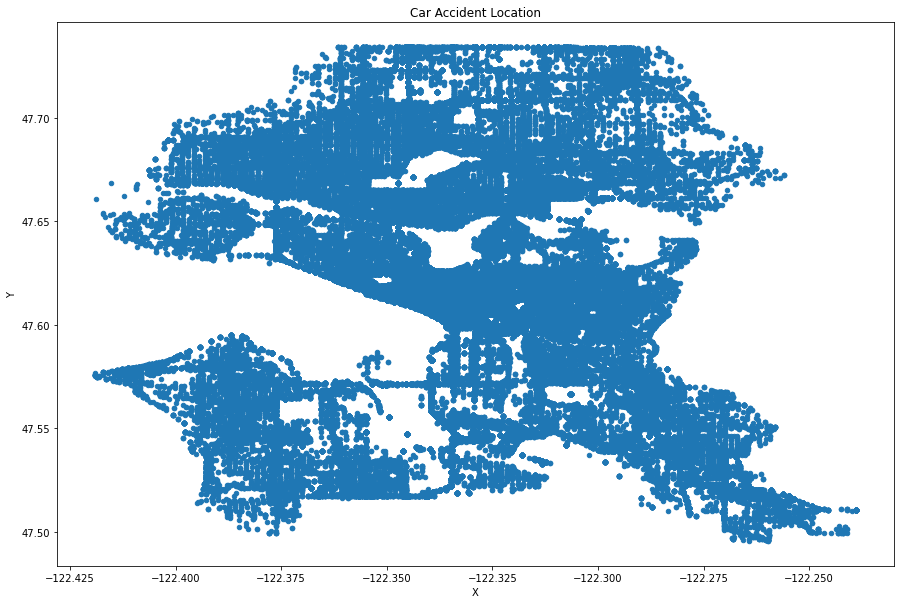

In [18]:
dataset.plot(kind="scatter", x="X", y="Y", figsize=(15, 10), title="Car Accident Location")

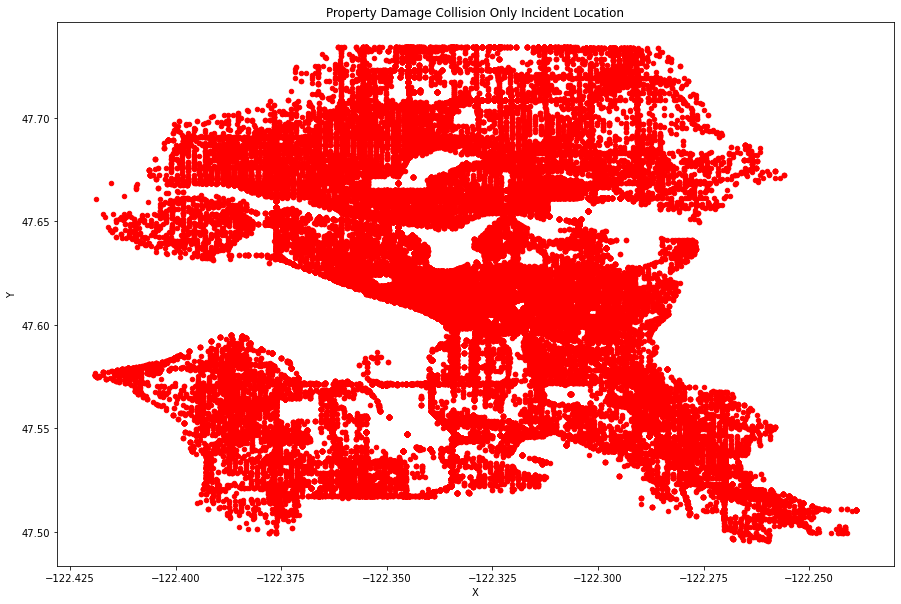

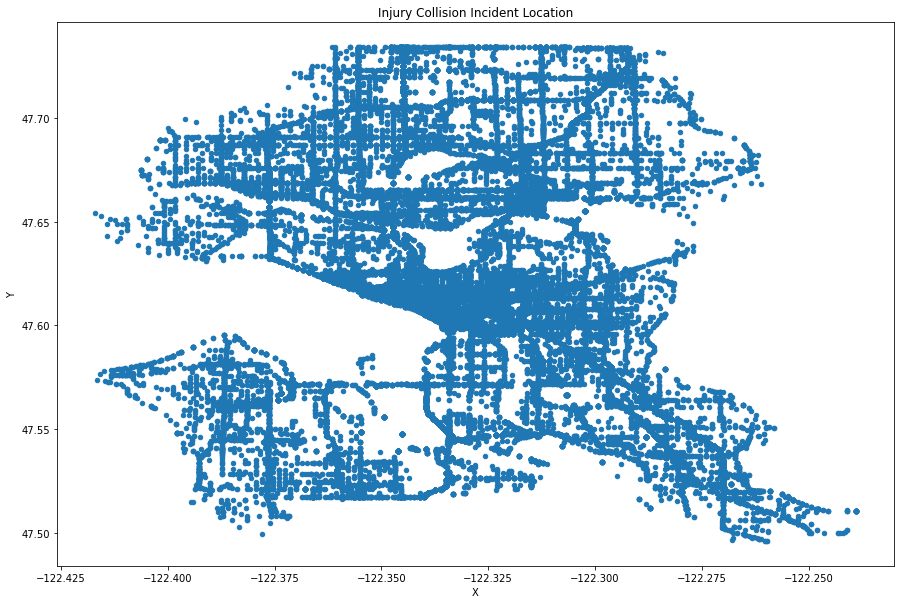

In [19]:
property_damage_only = dataset.loc[dataset["SEVERITYCODE"] == 1]
injury_collision = dataset.loc[dataset["SEVERITYCODE"] == 2]

property_damage_only.plot(kind="scatter", x="X", y="Y", figsize=(15,10), color="red", title="Property Damage Collision Only Incident Location")
injury_collision.plot(kind="scatter", x="X", y="Y", figsize=(15,10), title="Injury Collision Incident Location")

In [20]:
print(property_damage_only.shape)
print(injury_collision.shape)

(124258, 164)
(55809, 164)


Conclusion: Visually, they are indentical --> remove from feature set

dataset.drop(["X", "Y"], axis=1, inplace=True)

Creating first model using svm

Split dataset in the following ratio train:val:test = 6:2:2

In [21]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)
print(X_train.shape + y_train.shape)
print(X_val.shape + y_val.shape)
print(X_test.shape + y_test.shape)

(108039, 163, 108039)
(36014, 163, 36014)
(36014, 163, 36014)


In [ ]:
from sklearn.svm import SVC
model = SVC(C=1, kernel="linear").fit(X_train, y_train)
y_hat = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print(accuracy_score(y_test, y_hat))